# Soft Computing

## Cvičení 4 - Regrese (cvičení na míru pro Petra Kuberu)

### On-site cvičení

#### 4.1 Datová analýza

nahrání modulů

In [1]:
import pandas as pd

načtení datové sady

In [2]:
file_path = 'SOC4_soubory/regrese-sofcomputing.csv'
df = pd.read_csv(file_path)
print(df.columns)

Index(['Unnamed: 0', 'srazky', 'rychlost_vetru', 'max_rychlost_vetru',
       'vlhkost', 'teplota', 'tlak', 'hladina'],
      dtype='object')


In [3]:
dates = df['Unnamed: 0']
dates

0      2020-01-01
1      2020-01-02
2      2020-01-03
3      2020-01-04
4      2020-01-05
          ...    
634    2021-09-26
635    2021-09-27
636    2021-09-28
637    2021-09-29
638    2021-09-30
Name: Unnamed: 0, Length: 639, dtype: object

In [4]:
feature_cols = [
    #'Unnamed: 0', 
    'srazky', 
    'rychlost_vetru', 
    'max_rychlost_vetru', 
    'vlhkost',
    'teplota',
    'tlak']

In [5]:
X = df.loc[:, feature_cols]
X

,srazky,rychlost_vetru,max_rychlost_vetru,vlhkost,teplota,tlak
0,0.00,0.9,7.4,78,-0.2,1032.857264
1,0.00,0.3,1.8,99,-4.6,1029.469955
2,0.10,0.0,6.9,100,-1.2,1022.193215
3,1.75,4.7,16.0,71,4.0,1021.971924
4,0.00,2.6,13.3,70,1.0,1032.023281
...,...,...,...,...,...,...
634,0.20,0.0,3.3,83,16.2,1014.916097
635,0.00,0.4,4.4,89,17.2,1013.344250
636,0.00,0.9,9.5,87,14.4,1017.230562
637,0.30,2.0,10.4,80,15.2,1015.627792


In [6]:
y = df['hladina']
y

0      17.877630
1      17.827085
2      17.561905
3      17.309510
4      17.486175
         ...    
634    24.626700
635    24.716140
636    24.767230
637    24.869455
638    24.984560
Name: hladina, Length: 639, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
dates_train, dates_test, X_train, X_test, y_train, y_test = train_test_split(dates, X, y, test_size=1./3.)

#### 4.2 Podpůrné vektory

In [16]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [34]:
svr_rbf = make_pipeline(StandardScaler(), SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1))
svr_lin = make_pipeline(StandardScaler(), SVR(kernel="linear", C=100, gamma="auto"))
svr_poly = make_pipeline(StandardScaler(), SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1))
svr_c_high = make_pipeline(StandardScaler(), SVR(kernel="rbf", C=10000, gamma="auto"))

models = [
    svr_rbf,
    svr_lin,
    #svr_poly,
    svr_c_high,
]

In [35]:
for svr in models:
    svr.fit(X_train, y_train)
    svr_score = svr.score(X_test, y_test)
    print(svr_score)

0.1409073284102862
0.12211932292506156
-3.0101939800154973


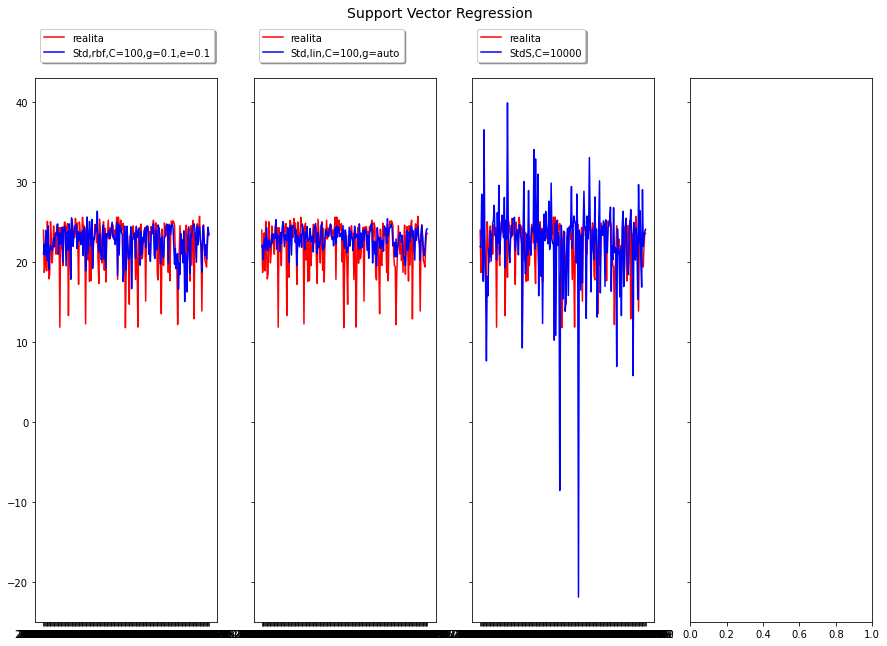

In [42]:
import numpy as np
import matplotlib.pyplot as plt

titles = [
    'Std,rbf,C=100,g=0.1,e=0.1',
    'Std,lin,C=100,g=auto',
    'StdS,C=10000',
    ]

fig, axes = plt.subplots(nrows=len(models)//4+1, ncols=len(models)%4+1, figsize=(15, 10), sharey=True)
for imodel, svr in enumerate(models):
    axes[imodel].plot(
        dates_test,
        y_test,
        color='r',
        label='realita',
    )
    axes[imodel].plot(
        dates_test,
        svr.predict(X_test),
        color='b',
        label=titles[imodel],
    )
    axes[imodel].legend(
        loc="upper left",
        bbox_to_anchor=(0, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

#### 4.4 Rozhodovací stromy

#### 4.5 Náhodný les